1. 파일 불러오기

In [507]:
import os
import pandas as pd

# 정상/벨트 느슨함

files1=os.listdir('2.2/01/normal')
for i in files1:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/01/normal/{i}',skiprows=9,header=None)
files2=os.listdir('2.2/01/loose')
for i in files2:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/01/loose/{i}',skiprows=9,header=None)

# 정상/베어링 불량

files3=os.listdir('2.2/02/normal')
for i in files3:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/02/normal/{i}',skiprows=9,header=None)
files4=os.listdir('2.2/02/bearing_error')
for i in files4:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/02/bearing_error/{i}',skiprows=9,header=None)

# 정상/회전체 불평형

files5=os.listdir('2.2/03/normal')
for i in files5:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/03/normal/{i}',skiprows=9,header=None)
files6=os.listdir('2.2/03/imbalance')
for i in files6:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/03/imbalance/{i}',skiprows=9,header=None)

# 정상/축정렬 불량

files7=os.listdir('2.2/04/normal')
for i in files7:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/04/normal/{i}',skiprows=9,header=None)
files8=os.listdir('2.2/04/axis_error')
for i in files8:
    globals()[i.split('.')[0]]=pd.read_csv(f'2.2/04/axis_error/{i}',skiprows=9,header=None)



In [508]:
# 불필요한 행 삭제 및 columns 정의

for i in range(1,301):
    del eval('nor1_'+str(i))[2]
    eval('nor1_'+str(i)).columns=['time','amplitude']
    
for i in range(1,301):
    del eval('nor2_'+str(i))[2]
    eval('nor2_'+str(i)).columns=['time','amplitude']

for i in range(1,301):
    del eval('nor3_'+str(i))[2]
    eval('nor3_'+str(i)).columns=['time','amplitude']

for i in range(1,301):
    del eval('nor4_'+str(i))[2]
    eval('nor4_'+str(i)).columns=['time','amplitude']
    
for i in range(1,301):
    del eval('loose_'+str(i))[2]
    eval('loose_'+str(i)).columns=['time','amplitude']

for i in range(1,301):
    del eval('b_error_'+str(i))[2]
    eval('b_error_'+str(i)).columns=['time','amplitude']
    
for i in range(1,301):
    del eval('a_error_'+str(i))[2]
    eval('a_error_'+str(i)).columns=['time','amplitude']
    
for i in range(1,301):
    del eval('imbalance_'+str(i))[2]
    eval('imbalance_'+str(i)).columns=['time','amplitude']

In [509]:
nor1_1

,time,amplitude
0,0.00000,0.003712
1,0.00025,-0.001601
2,0.00050,0.008018
3,0.00075,0.008828
4,0.00100,0.001557
...,...,...
11995,2.99875,-0.017120
11996,2.99900,-0.016496
11997,2.99925,-0.007543
11998,2.99950,-0.001354


(-0.03, 0.03)

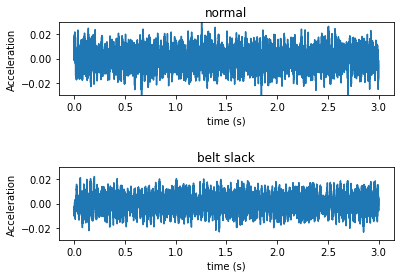

In [411]:
# 정상 비정상 데이터 비교 -> 벨트 느슨함
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(nor1_1['time'],nor1_1['amplitude'])
plt.title('normal')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])

plt.subplot(2,1,2)
plt.plot(loose_1['time'],loose_1['amplitude'])
plt.title('belt slack')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])


(-0.03, 0.03)

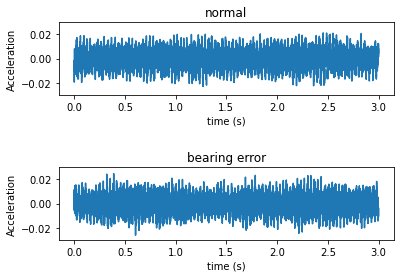

In [412]:
# 베어링 불량
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(nor2_1['time'],nor2_1['amplitude'])
plt.title('normal')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])

plt.subplot(2,1,2)
plt.plot(b_error_1['time'],b_error_1['amplitude'])
plt.title('bearing error')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])

(-0.05, 0.05)

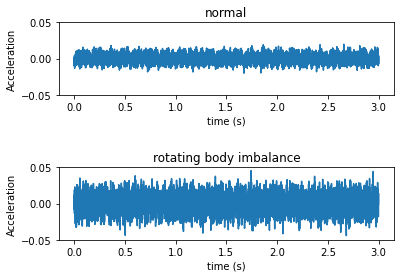

In [413]:
# 회전체 불평형
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(nor3_1['time'],nor3_1['amplitude'])
plt.title('normal')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.05,0.05])

plt.subplot(2,1,2)
plt.plot(imbalance_1['time'],imbalance_1['amplitude'])
plt.title('rotating body imbalance')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.05,0.05])

(-0.03, 0.03)

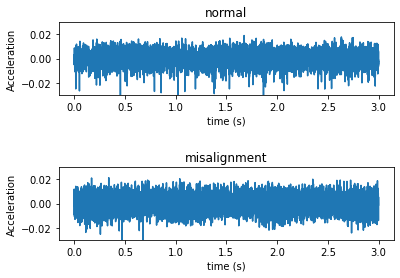

In [414]:
# 축정렬 불량
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(nor4_1['time'],nor4_1['amplitude'])
plt.title('normal')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])

plt.subplot(2,1,2)
plt.plot(a_error_1['time'],a_error_1['amplitude'])
plt.title('misalignment')
plt.xlabel('time (s)')
plt.ylabel('Acceleration')
plt.ylim([-0.03,0.03])

(0.0, 0.0055)

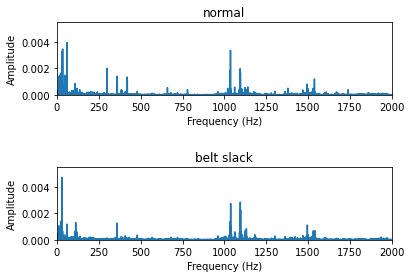

In [415]:
# FFT 변환 -> 주파수 함수
# 벨트 느슨함
import numpy as np
Fs=4000 # Sampling frequency
T=1/Fs # 주기

fft1=np.fft.fft(nor1_1['amplitude'])
amplitude1=abs(fft1)*(2/len(fft1))
frequency1=np.fft.fftfreq(len(fft1),T)


fft2=np.fft.fft(loose_1['amplitude'])
amplitude2=abs(fft2)*(2/len(fft2))
frequency2=np.fft.fftfreq(len(fft2),T)

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(frequency1,amplitude1)
plt.title('normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.0055)

plt.subplot(2,1,2)
plt.plot(frequency2,amplitude2)
plt.title('belt slack')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.0055)

(0.0, 0.0055)

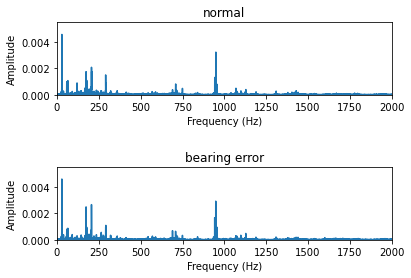

In [416]:
# 베어링 불량
fft3=np.fft.fft(nor2_1['amplitude'])
amplitude3=abs(fft3)*(2/len(fft3))
frequency3=np.fft.fftfreq(len(fft3),T)


fft4=np.fft.fft(b_error_1['amplitude'])
amplitude4=abs(fft4)*(2/len(fft4))
frequency4=np.fft.fftfreq(len(fft4),T)

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(frequency3,amplitude3)
plt.title('normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.0055)

plt.subplot(2,1,2)
plt.plot(frequency4,amplitude4)
plt.title('bearing error')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.0055)


(0.0, 0.006)

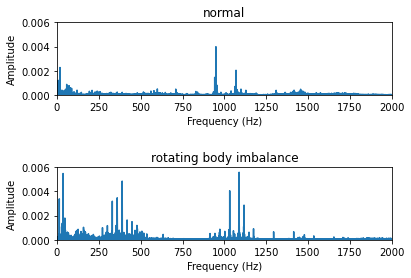

In [417]:
# 회전체 불평형
fft5=np.fft.fft(nor3_1['amplitude'])
amplitude5=abs(fft5)*(2/len(fft5))
frequency5=np.fft.fftfreq(len(fft5),T)


fft6=np.fft.fft(imbalance_1['amplitude'])
amplitude6=abs(fft6)*(2/len(fft6))
frequency6=np.fft.fftfreq(len(fft6),T)

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(frequency5,amplitude5)
plt.title('normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.006)

plt.subplot(2,1,2)
plt.plot(frequency6,amplitude6)
plt.title('rotating body imbalance')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.006)


(0.0, 0.004)

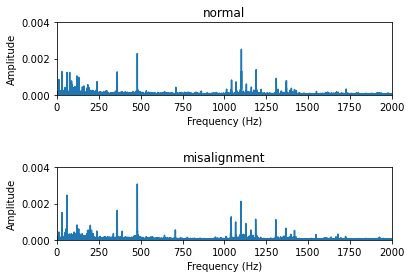

In [418]:
# 축정렬 불량
fft7=np.fft.fft(nor4_1['amplitude'])
amplitude7=abs(fft7)*(2/len(fft7))
frequency7=np.fft.fftfreq(len(fft7),T)


fft8=np.fft.fft(a_error_1['amplitude'])
amplitude8=abs(fft8)*(2/len(fft8))
frequency8=np.fft.fftfreq(len(fft8),T)

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(frequency7,amplitude7)
plt.title('normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.004)

plt.subplot(2,1,2)
plt.plot(frequency8,amplitude8)
plt.title('misalignment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,2000)
plt.ylim(0,0.004)


In [510]:
# 상위 10개의 이상값 추출 정의함수
def top10(a):
    fft=np.fft.fft(a['amplitude'])
    amplitude=abs(fft)*(2/len(fft))
    top=np.sort(amplitude)[::-1]
    return top[:10]

In [511]:
# 각 이상값을 추출하여 데이터 프레임으로 만듬

# 벨트 느슨함
l=np.zeros(shape=(11,))

for i in range(1,301):
    a=top10(eval('nor1_'+str(i)))
    b=top10(eval('loose_'+str(i)))
    a=np.append(a,['normal'])
    b=np.append(b,['belt slack'])
    l=np.vstack([l,a])
    l=np.vstack([l,b])

loose=pd.DataFrame(l)
loose.columns=[1,2,3,4,5,6,7,8,9,10,'state']
loose=loose.drop([loose.index[0]])
loose[[1,2,3,4,5,6,7,8,9,10]]=loose[[1,2,3,4,5,6,7,8,9,10]].apply(pd.to_numeric)

# 베어링 불량
be=np.zeros(shape=(11,))

for i in range(1,301):
    a=top10(eval('nor2_'+str(i)))
    b=top10(eval('b_error_'+str(i)))
    a=np.append(a,['normal'])
    b=np.append(b,['bearing error'])
    be=np.vstack([be,a])
    be=np.vstack([be,b])

bearing_error=pd.DataFrame(be)
bearing_error.columns=[1,2,3,4,5,6,7,8,9,10,'state']
bearing_error=bearing_error.drop([bearing_error.index[0]])
bearing_error[[1,2,3,4,5,6,7,8,9,10]]=bearing_error[[1,2,3,4,5,6,7,8,9,10]].apply(pd.to_numeric)

# 회전체 불평형
im=np.zeros(shape=(11,))

for i in range(1,301):
    a=top10(eval('nor3_'+str(i)))
    b=top10(eval('imbalance_'+str(i)))
    a=np.append(a,['normal'])
    b=np.append(b,['rotating body imbalance'])
    im=np.vstack([im,a])
    im=np.vstack([im,b])

imbalance=pd.DataFrame(im)
imbalance.columns=[1,2,3,4,5,6,7,8,9,10,'state']
imbalance=imbalance.drop([imbalance.index[0]])
imbalance[[1,2,3,4,5,6,7,8,9,10]]=imbalance[[1,2,3,4,5,6,7,8,9,10]].apply(pd.to_numeric)

# 축정렬 불량
ae=np.zeros(shape=(11,))

for i in range(1,301):
    a=top10(eval('nor4_'+str(i)))
    b=top10(eval('a_error_'+str(i)))
    a=np.append(a,['normal'])
    b=np.append(b,['misalignment'])
    ae=np.vstack([ae,a])
    ae=np.vstack([ae,b])

axis_error=pd.DataFrame(ae)
axis_error.columns=[1,2,3,4,5,6,7,8,9,10,'state']
axis_error=axis_error.drop([axis_error.index[0]])
axis_error[[1,2,3,4,5,6,7,8,9,10]]=axis_error[[1,2,3,4,5,6,7,8,9,10]].apply(pd.to_numeric)

In [512]:
loose

,1,2,3,4,5,6,7,8,9,10,state
1,0.003964,0.003964,0.003482,0.003482,0.003385,0.003385,0.003284,0.003284,0.002018,0.002018,normal
2,0.004738,0.004738,0.002862,0.002862,0.002759,0.002759,0.002253,0.002253,0.001406,0.001406,belt slack
3,0.003918,0.003918,0.003491,0.003491,0.003485,0.003485,0.003230,0.003230,0.002270,0.002270,normal
4,0.004836,0.004836,0.002698,0.002698,0.002522,0.002522,0.002105,0.002105,0.001349,0.001349,belt slack
5,0.003967,0.003967,0.003389,0.003389,0.003342,0.003342,0.003226,0.003226,0.002068,0.002068,normal
...,...,...,...,...,...,...,...,...,...,...,...
596,0.004821,0.004821,0.003077,0.003077,0.002485,0.002485,0.001502,0.001502,0.001344,0.001344,belt slack
597,0.003739,0.003739,0.003661,0.003661,0.003451,0.003451,0.002871,0.002871,0.002695,0.002695,normal
598,0.004879,0.004879,0.002764,0.002764,0.002444,0.002444,0.002212,0.002212,0.001561,0.001561,belt slack
599,0.003774,0.003774,0.003460,0.003460,0.003392,0.003392,0.003024,0.003024,0.002592,0.002592,normal


# 1. 벨트 느슨함

In [513]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


loose=loose.replace('normal',0)
loose=loose.replace('belt slack',1)

X=loose[loose.columns[:-1]]
y=loose[['state']]

train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 56)

# GaussianNB (Naive Bayes)

In [514]:
model = GaussianNB()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

C:\Users\User2190\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

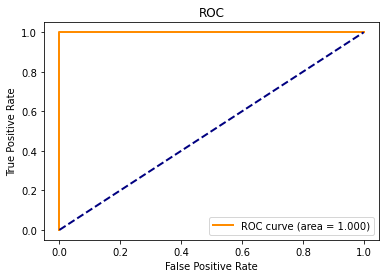

1.0

In [515]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

# DecisionTreeClassifer

In [516]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

0.9888888888888889

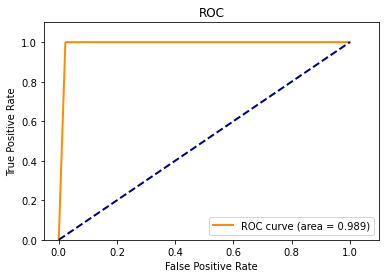

0.9886363636363636

In [517]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

2. 베어링 불량

In [518]:
bearing_error=bearing_error.replace('normal',0)
bearing_error=bearing_error.replace('bearing error',1)

X=bearing_error[bearing_error.columns[:-1]]
y=bearing_error[['state']]

train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 42)


# NB

In [519]:
model = GaussianNB()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

C:\Users\User2190\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8833333333333333

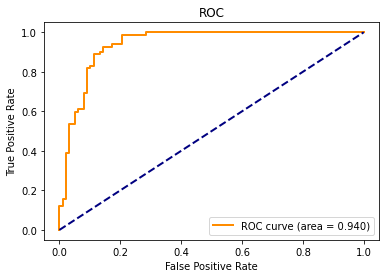

0.9396465903434544

In [520]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

0.9396465903434544

# DecisionTreeClassifer

In [521]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

0.8555555555555555

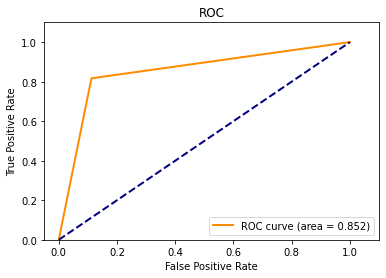

0.8524141363862617

In [522]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

0.8412145345943255

3. 회전체 불평형

In [523]:
imbalance=imbalance.replace('normal',0)
imbalance=imbalance.replace('rotating body imbalance',1)

X=imbalance[imbalance.columns[:-1]]
y=imbalance[['state']]

train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 88)


# NB

In [524]:
model = GaussianNB()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

C:\Users\User2190\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

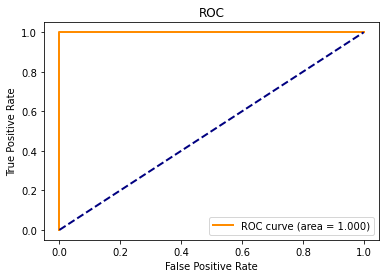

1.0

In [525]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

1.0

DT

In [526]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

1.0

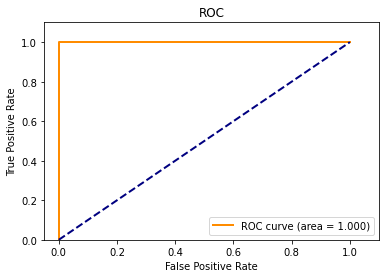

1.0

In [527]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

1.0

4. 축정렬 불량

In [528]:
axis_error=axis_error.replace('normal',0)
axis_error=axis_error.replace('misalignment',1)

X=axis_error[axis_error.columns[:-1]]
y=axis_error[['state']]

train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 15)

# NB

In [529]:
model = GaussianNB()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

C:\Users\User2190\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

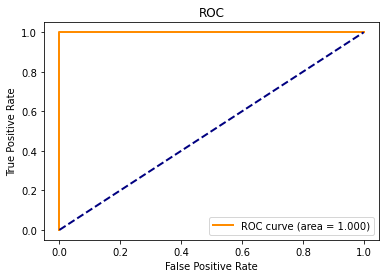

1.0

In [530]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

1.0

# DT

In [531]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)

pred_test = model.predict(test_X)
accuracy_score(test_y, pred_test)

0.9888888888888889

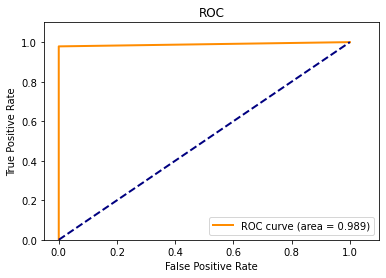

0.989247311827957

In [532]:
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()
roc_auc

0.989247311827957